In [17]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# dataset
df = pd.read_csv("/content/drive/MyDrive/climate_change_dataset.csv")
df

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
...,...,...,...,...,...,...,...,...,...,...
995,2019,India,23.6,8.0,1.2,1365,1358019778,10.0,8,20.2
996,2000,UK,21.8,10.0,2.2,1273,876123161,14.9,14,30.1
997,2019,Argentina,23.8,8.9,4.7,891,1120533308,25.9,10,46.5
998,2016,Australia,21.0,14.9,3.1,1136,380662109,24.5,3,44.5


In [19]:
# get data only from country, Germany
data = df.loc[df["Country"] == "Germany"]

In [20]:
#sort year
df_sorted = data.sort_values("Year")
df_sorted

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
332,2000,Germany,5.1,11.2,1.6,2378,495220820,33.7,6,69.2
951,2000,Germany,14.4,0.7,1.3,2904,1357011909,30.8,5,15.6
946,2001,Germany,30.3,9.7,5.0,2257,16901724,18.7,14,50.3
780,2001,Germany,6.3,6.7,3.2,2378,1119422832,26.2,11,50.7
777,2001,Germany,19.2,16.3,3.9,1305,1178735383,8.9,13,45.7
...,...,...,...,...,...,...,...,...,...,...
137,2022,Germany,22.9,14.9,3.3,654,1331115761,44.6,8,10.5
220,2022,Germany,27.0,19.6,2.5,1338,990503091,44.4,3,47.9
386,2023,Germany,18.3,4.2,3.0,2976,1017684486,40.2,1,52.5
283,2023,Germany,32.4,12.0,1.5,1832,555356797,6.0,2,50.9


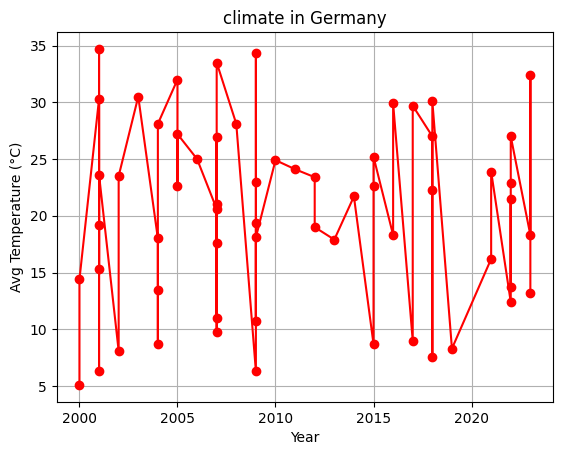

In [21]:
# get x- and y-values from dataset
x = df_sorted['Year']
y = df_sorted['Avg Temperature (°C)']

# plot data
plt.plot(x, y, "-o", color="red")
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.title("climate in Germany")
plt.grid()

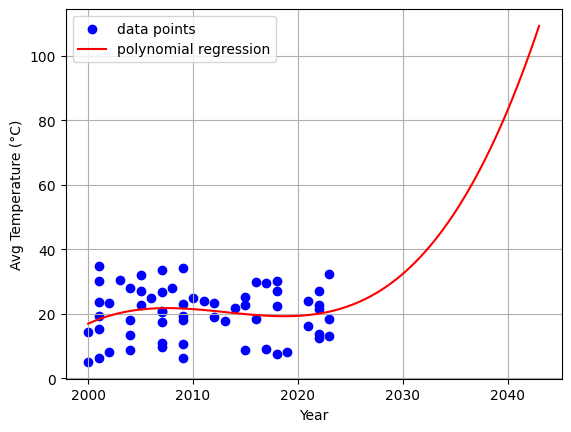

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# prepare data and get x- and y-values from dataset
X = df_sorted["Year"].values.reshape(-1, 1)
y = df_sorted["Avg Temperature (°C)"].values

# create polynomial features (degree 6)
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

# linear regression with polynomial features (degree 6)
model = LinearRegression()
model.fit(X_poly, y)

# predict y-values
X_pred = np.linspace(X.min(), X.max()+20, 100).reshape(-1, 1)
X_pred_poly = poly.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# plot
plt.scatter(X, y, color="blue", label="data points")
plt.plot(X_pred, y_pred, color="red", label="polynomial regression")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.grid()
plt.legend()